In [ ]:
!pip install pycaret pandas matplotlib seaborn openpyxl

Import libraries:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load the insurance dataset

In [ ]:
# Load the dataset directly from the URL
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)


Explore the dataset:

In [ ]:
# Display the first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Get dataset information
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Encode Categorical Variables:

PyCaret handles categorical variables internally, but it's good practice to ensure they are of type 'category'.

In [ ]:
# Convert categorical columns to 'category' dtype
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category')


Visualize Data Distributions:

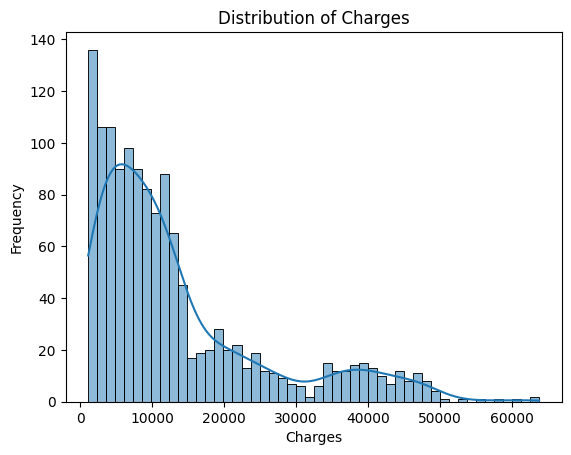

In [ ]:
# Visualize the distribution of charges
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


Apply AutoML with PyCaret
Import PyCaret's Regression Module:

In [ ]:
from pycaret.regression import *


Initialize the Setup:

In [ ]:
# Initialize the setup
s = setup(data=df, target='charges', session_id=123)


,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


Compare Models:

In [ ]:
# Compare all models and select the best one
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1480
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3440
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.3850
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.2830
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0790
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1920
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1110
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0710
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.7410
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0660


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Finalize the Gradient Boosting Regressor Model:

In [ ]:
# Finalize the Gradient Boosting Regressor model
final_model = finalize_model(best_model)

Generate Predictions on the Dataset
Use the finalized model to predict charges for each record in your dataset.

In [ ]:
# Generate predictions
predictions = predict_model(final_model, data=df)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2080.2880,14839554.5544,3852.2142,0.8987,0.3421,0.2415


This will add a new column named Label to the DataFrame, representing the predicted charges.

Evaluate Model Performance
Assess the performance of the finalized model using PyCaret's evaluation tools.

In [ ]:
# Evaluate the model
evaluate_model(final_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

No charts were generated by quickchart


Export Predictions for Power BI Visualization
Prepare your data for visualization by exporting the predictions to an Excel file.

In [ ]:
# Export predictions to Excel
predictions.to_excel('insurance_predictions.xlsx', index=False)
